In [1270]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

In [1272]:
df = pd.read_csv("../../data/csv_files/df_ph1.csv")

In [1274]:
df['dt'] = pd.to_datetime(df['dt'])

In [1276]:
print(df.shape)
df.head()

(7748, 10)


,dt,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D
0,2023-07-28 05:00:00,3.979692,4.231642,4.162819,4.181472,4.128811,5.273175,7.715749,6.417295,3.767151
1,2023-07-28 06:00:00,3.980776,4.233550,4.163253,4.181599,4.129336,5.274380,7.713223,6.418118,3.767072
2,2023-07-28 07:00:00,3.980825,4.236443,4.163040,4.179049,4.129939,5.271060,7.712299,6.417948,3.767076
3,2023-07-28 08:00:00,3.981121,4.236699,4.166883,NaN,4.130379,5.267786,7.712222,6.417735,3.767253
4,2023-07-28 09:00:00,3.981221,4.239193,4.168008,NaN,4.130503,5.265711,7.712381,6.417951,3.767425


In [1278]:
stations = list(df.columns)
stations.remove('dt')

In [1280]:
time_duration = {}
for start, end in zip(start_array, end_array):
    time_duration[(start, end)] = pd.to_datetime(end) - pd.to_datetime(start)

In [1282]:
for key, value in time_duration.items():
    if value > pd.Timedelta(days= 1):
        print(f"{key}: {value}")

(Timestamp('2023-07-28 08:00:00'), Timestamp('2023-07-31 13:00:00')): 3 days 05:00:00
(Timestamp('2023-07-31 14:00:00'), Timestamp('2023-08-03 22:00:00')): 3 days 08:00:00
(Timestamp('2023-08-04 07:00:00'), Timestamp('2023-08-08 04:00:00')): 3 days 21:00:00
(Timestamp('2023-08-09 11:00:00'), Timestamp('2023-08-13 16:00:00')): 4 days 05:00:00
(Timestamp('2023-08-13 20:00:00'), Timestamp('2023-08-19 05:00:00')): 5 days 09:00:00
(Timestamp('2023-08-19 09:00:00'), Timestamp('2023-08-21 19:00:00')): 2 days 10:00:00
(Timestamp('2023-08-23 20:00:00'), Timestamp('2023-08-28 16:00:00')): 4 days 20:00:00
(Timestamp('2023-08-28 17:00:00'), Timestamp('2023-08-31 07:00:00')): 2 days 14:00:00
(Timestamp('2023-08-31 22:00:00'), Timestamp('2023-10-18 14:45:00')): 47 days 16:45:00
(Timestamp('2024-01-01 01:00:00'), Timestamp('2024-01-24 14:06:00')): 23 days 13:06:00


In [1284]:
first_range = ["2023-07-28 05:00:00", "2023-08-31 22:00:00"]
second_range = ["2023-10-18 16:00:00", "2024-01-01 01:00:00"]
third_range = ["2024-01-24 14:06:00", "2024-06-13 01:00:00"]
time_ranges = [first_range, second_range, third_range]

In [1286]:
conditions = [((df['dt'] >= start) & (df['dt'] < end)) for start, end in time_ranges]
combined_condition = conditions[0]
for condition in conditions[1:]:
    combined_condition |= condition

new_df = df[combined_condition]
new_df.shape

(6022, 10)

In [1288]:
new_df.isna().sum()

dt             0
FEX_004       33
FSB_095DR     65
FSB_078       32
FSB_126      907
FSB_130D     259
FPZ_06A       36
FSB_079       31
FPZ_04A      121
FSB_097D     198
dtype: int64

In [1290]:
df_interpolate_all = new_df.copy()
for col in stations_name:
    df_interpolate_all[col] = df_interpolate_all[col].interpolate()

In [1292]:
df_interpolate.isna().sum()

FEX_004      0
FSB_095DR    0
FSB_078      0
FSB_126      0
FSB_130D     0
FPZ_06A      0
FSB_079      0
FPZ_04A      0
FSB_097D     0
dtype: int64

In [1294]:
df_interpolate_all.head()

,dt,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D
0,2023-07-28 05:00:00,3.979692,4.231642,4.162819,4.181472,4.128811,5.273175,7.715749,6.417295,3.767151
1,2023-07-28 06:00:00,3.980776,4.233550,4.163253,4.181599,4.129336,5.274380,7.713223,6.418118,3.767072
2,2023-07-28 07:00:00,3.980825,4.236443,4.163040,4.179049,4.129939,5.271060,7.712299,6.417948,3.767076
3,2023-07-28 08:00:00,3.981121,4.236699,4.166883,4.179205,4.130379,5.267786,7.712222,6.417735,3.767253
4,2023-07-28 09:00:00,3.981221,4.239193,4.168008,4.179361,4.130503,5.265711,7.712381,6.417951,3.767425


In [1296]:
df_interpolate = df_interpolate_all.drop(columns = ["dt"])

In [1298]:
df_interpolate[:20]

,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D
0,3.979692,4.231642,4.162819,4.181472,4.128811,5.273175,7.715749,6.417295,3.767151
1,3.980776,4.233550,4.163253,4.181599,4.129336,5.274380,7.713223,6.418118,3.767072
2,3.980825,4.236443,4.163040,4.179049,4.129939,5.271060,7.712299,6.417948,3.767076
3,3.981121,4.236699,4.166883,4.179205,4.130379,5.267786,7.712222,6.417735,3.767253
4,3.981221,4.239193,4.168008,4.179361,4.130503,5.265711,7.712381,6.417951,3.767425
5,3.980744,4.239561,4.167699,4.179517,4.131535,5.262128,7.713662,6.417348,3.767600
6,3.981171,4.239878,4.170600,4.179673,4.132225,5.259296,7.715626,6.416831,3.767326
7,3.981380,4.240606,4.170594,4.179830,4.131885,5.256999,7.716349,6.416962,3.767770
8,3.982334,4.242422,4.174381,4.179986,4.132148,5.254261,7.717993,6.416275,3.767944
9,3.982292,4.241088,4.175074,4.180142,4.133276,5.252848,7.718636,6.416492,3.768030


In [1300]:
def create_overlapping_sequences(df, rows_per_group, overlap):
    sequences = []
    for start in range(0, len(df) - rows_per_group + 1, rows_per_group - overlap):
        seq = df.iloc[start:start + rows_per_group].values.flatten()
        sequences.append(seq)
    return pd.DataFrame(sequences)

In [1302]:
reshaped_df = create_overlapping_sequences(df_interpolate, 10, 5)
reshaped_df.shape

(1203, 90)

In [1304]:
input_array = reshaped_df.values.flatten()
reshaped_input_array = input_array.reshape(-1,9)
reshaped_input_df = pd.DataFrame(reshaped_input_array)

In [1306]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(reshaped_df)

In [1308]:
tensor_data = torch.tensor(scaled_df, dtype=torch.float32)

dataset = TensorDataset(tensor_data, tensor_data)
dataloader = DataLoader(dataset, batch_size = 64, shuffle = True)

In [1310]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        #encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 60),  
            nn.ReLU(),
            nn.Linear(60, 45),        
            nn.ReLU(),
            nn.Linear(45, 30),        
            nn.ReLU(),
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(30, 45),         
            nn.ReLU(),
            nn.Linear(45, 60),        
            nn.ReLU(),
            nn.Linear(60, input_dim), 
            nn.Sigmoid()               
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [1312]:
input_dim = scaled_df.shape[1]
model = Autoencoder(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [1314]:
num_epochs = 100
losses = []

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size =  10, gamma = 0.1)
for epoch in range(num_epochs):
    for data in dataloader:
        inputs, _ = data
        
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, inputs)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    scheduler.step()
        
    #appending the error to the losses array
    losses.append(loss.item())
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    # if loss.item() < 0.4:
    #     break
        
# try other way as well

Epoch [1/100], Loss: 1.1791
Epoch [2/100], Loss: 0.8179
Epoch [3/100], Loss: 0.7231
Epoch [4/100], Loss: 0.6476
Epoch [5/100], Loss: 0.6812
Epoch [6/100], Loss: 0.8226
Epoch [7/100], Loss: 0.5556
Epoch [8/100], Loss: 0.5945
Epoch [9/100], Loss: 0.8557
Epoch [10/100], Loss: 0.5280
Epoch [11/100], Loss: 0.5266
Epoch [12/100], Loss: 0.5242
Epoch [13/100], Loss: 0.5587
Epoch [14/100], Loss: 0.8903
Epoch [15/100], Loss: 0.5186
Epoch [16/100], Loss: 0.4601
Epoch [17/100], Loss: 0.4751
Epoch [18/100], Loss: 0.6359
Epoch [19/100], Loss: 0.4888
Epoch [20/100], Loss: 0.5141
Epoch [21/100], Loss: 0.5404
Epoch [22/100], Loss: 0.5893
Epoch [23/100], Loss: 0.6330
Epoch [24/100], Loss: 0.6339
Epoch [25/100], Loss: 0.6803
Epoch [26/100], Loss: 0.4818
Epoch [27/100], Loss: 0.6866
Epoch [28/100], Loss: 0.7643
Epoch [29/100], Loss: 0.6136
Epoch [30/100], Loss: 0.7222
Epoch [31/100], Loss: 0.6891
Epoch [32/100], Loss: 0.6611
Epoch [33/100], Loss: 0.6928
Epoch [34/100], Loss: 0.6784
Epoch [35/100], Loss: 0

In [1214]:
model.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=90, out_features=60, bias=True)
    (1): ReLU()
    (2): Linear(in_features=60, out_features=45, bias=True)
    (3): ReLU()
    (4): Linear(in_features=45, out_features=30, bias=True)
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=30, out_features=45, bias=True)
    (1): ReLU()
    (2): Linear(in_features=45, out_features=60, bias=True)
    (3): ReLU()
    (4): Linear(in_features=60, out_features=90, bias=True)
    (5): Sigmoid()
  )
)

In [1217]:
df_interpolate.shape

(6022, 9)

In [1219]:
input_df = df_interpolate[2:]
input_df.shape

(6020, 9)

In [1221]:
input_array = input_df.values.flatten()

In [1223]:
reshaped_input_array = input_array.reshape(-1, 90)

In [1225]:
reshaped_input_df = pd.DataFrame(reshaped_input_array)

In [1227]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(reshaped_input_df)

In [1229]:
tensor_input_data = torch.tensor(scaled_df, dtype=torch.float32)

In [1231]:
with torch.no_grad():
    reconstructed_data = model(tensor_input_data)


In [1233]:
predicted_df = pd.DataFrame(reconstructed_data)

In [1235]:
predicted_df.shape

(602, 90)

In [1237]:
predicted_df.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,4.958153e-28,3.455746e-33,3.489720e-21,2.507756e-14,1.051170e-22,0.691473,1.0,0.000018,8.935701e-25,1.125532e-30,...,7.339985e-28,5.885488e-26,6.831020e-31,1.256739e-21,1.432685e-15,7.250419e-24,0.226762,1.0,0.000013,8.768279e-34
1,1.611115e-27,1.482601e-32,8.610000e-21,4.400963e-14,2.774604e-22,0.619600,1.0,0.000022,2.520758e-24,4.168193e-30,...,2.422892e-27,1.796597e-25,2.569086e-30,3.105053e-21,2.736771e-15,2.039077e-23,0.184591,1.0,0.000016,3.674527e-33
2,3.466900e-27,3.500794e-32,1.487175e-20,6.628363e-14,5.032407e-22,0.689602,1.0,0.000025,4.985949e-24,9.496571e-30,...,5.066662e-27,3.539182e-25,5.892103e-30,5.560688e-21,4.109399e-15,3.767745e-23,0.235573,1.0,0.000018,9.266913e-33
3,1.579236e-27,2.736871e-33,5.829241e-21,8.612100e-14,1.512150e-22,0.999624,1.0,0.000044,1.799307e-24,2.286614e-30,...,1.014212e-27,1.078468e-25,1.283330e-30,3.842633e-21,2.421095e-15,7.287465e-24,0.996704,1.0,0.000040,2.426195e-33
4,9.211818e-27,3.676674e-32,2.171029e-20,1.747767e-13,6.627730e-22,0.996691,1.0,0.000046,9.101386e-24,1.720736e-29,...,7.507433e-27,5.673575e-25,1.083972e-29,1.229000e-20,6.255647e-15,4.261280e-23,0.974590,1.0,0.000038,2.282359e-32


In [1239]:
unscaled_df = pd.DataFrame(scaler.inverse_transform(predicted_df), columns = predicted_df.columns)
unscaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,4.202659,4.355382,4.297563,4.363481,4.338925,5.332790,8.116316,7.285331,3.992926,4.20271,...,3.99348,4.203282,4.355748,4.297987,4.363997,4.339839,5.259805,8.116508,7.287156,3.993553
1,4.202659,4.355382,4.297563,4.363481,4.338925,5.321349,8.116316,7.285333,3.992926,4.20271,...,3.99348,4.203282,4.355748,4.297987,4.363997,4.339839,5.253067,8.116508,7.287157,3.993553
2,4.202659,4.355382,4.297563,4.363481,4.338925,5.332492,8.116316,7.285334,3.992926,4.20271,...,3.99348,4.203282,4.355748,4.297987,4.363997,4.339839,5.261213,8.116508,7.287158,3.993553
3,4.202659,4.355382,4.297563,4.363481,4.338925,5.381842,8.116316,7.285342,3.992926,4.20271,...,3.99348,4.203282,4.355748,4.297987,4.363997,4.339839,5.382816,8.116508,7.287167,3.993553
4,4.202659,4.355382,4.297563,4.363481,4.338925,5.381375,8.116316,7.285343,3.992926,4.20271,...,3.99348,4.203282,4.355748,4.297987,4.363997,4.339839,5.379283,8.116508,7.287166,3.993553


In [1241]:
predicted_array = unscaled_df.values.flatten()

In [1243]:
predicted_reshaped_array = predicted_array.reshape(-1,9)

In [1245]:
predicted_reshaped_df = pd.DataFrame(predicted_reshaped_array)
predicted_reshaped_df.shape

(6020, 9)

In [1247]:
predicted_reshaped_df.head()

,0,1,2,3,4,5,6,7,8
0,4.202659,4.355382,4.297563,4.363481,4.338925,5.332790,8.116316,7.285331,3.992926
1,4.202710,4.355433,4.297680,4.363510,4.339035,5.323919,8.116394,7.285044,3.992976
2,4.202866,4.355517,4.298036,4.363612,4.339138,5.326231,8.117087,7.286580,3.993148
3,4.202916,4.355515,4.297745,4.363605,4.339501,5.298071,8.117066,7.285583,3.993194
4,4.202968,4.355567,4.297980,4.363679,4.339696,5.261041,8.117015,7.287139,3.993244


In [1249]:
index_station = {}
for index, station in enumerate(stations_name):
    index_station[index] = station

index_station


{0: 'FEX_004',
 1: 'FSB_095DR',
 2: 'FSB_078',
 3: 'FSB_126',
 4: 'FSB_130D',
 5: 'FPZ_06A',
 6: 'FSB_079',
 7: 'FPZ_04A',
 8: 'FSB_097D'}

In [1251]:
predicted_reshaped_df.rename(columns=index_station, inplace = True)

In [1253]:
print(predicted_reshaped_df.shape)
predicted_reshaped_df.head()

(6020, 9)


,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D
0,4.202659,4.355382,4.297563,4.363481,4.338925,5.332790,8.116316,7.285331,3.992926
1,4.202710,4.355433,4.297680,4.363510,4.339035,5.323919,8.116394,7.285044,3.992976
2,4.202866,4.355517,4.298036,4.363612,4.339138,5.326231,8.117087,7.286580,3.993148
3,4.202916,4.355515,4.297745,4.363605,4.339501,5.298071,8.117066,7.285583,3.993194
4,4.202968,4.355567,4.297980,4.363679,4.339696,5.261041,8.117015,7.287139,3.993244


In [1255]:
date_time = df_interpolate_all["dt"][2:]
date_time.shape

(6020,)

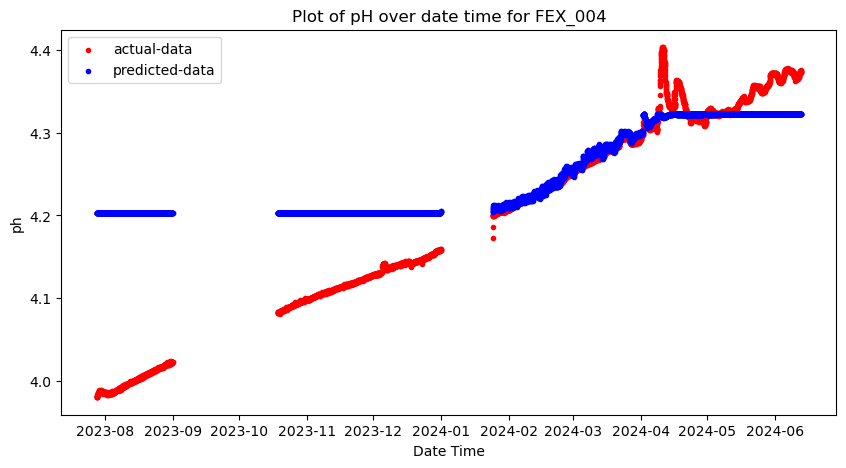

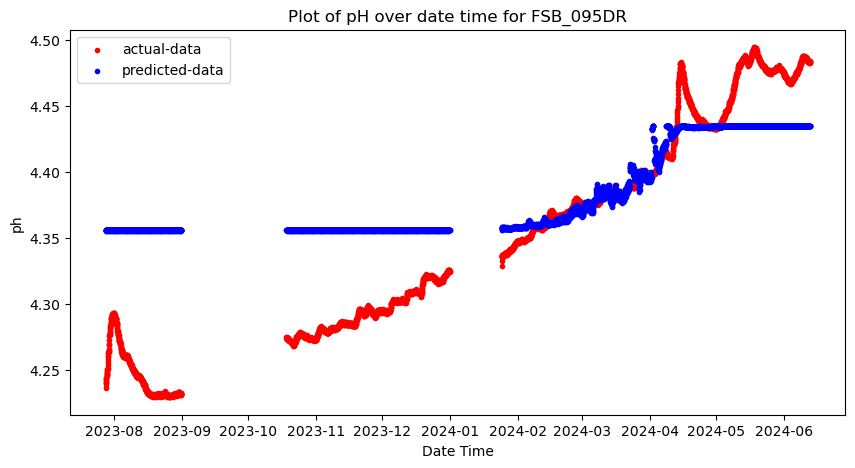

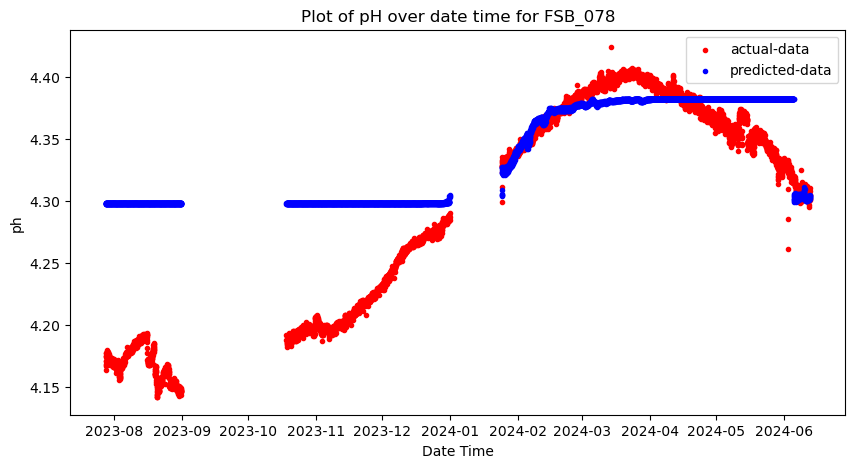

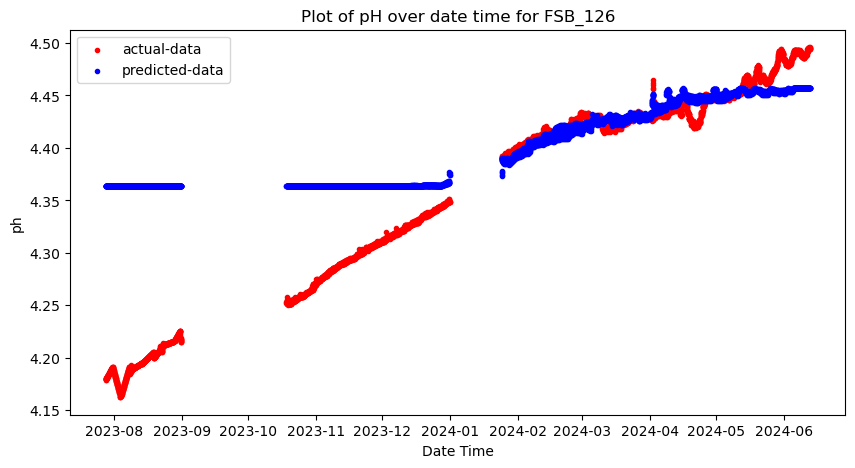

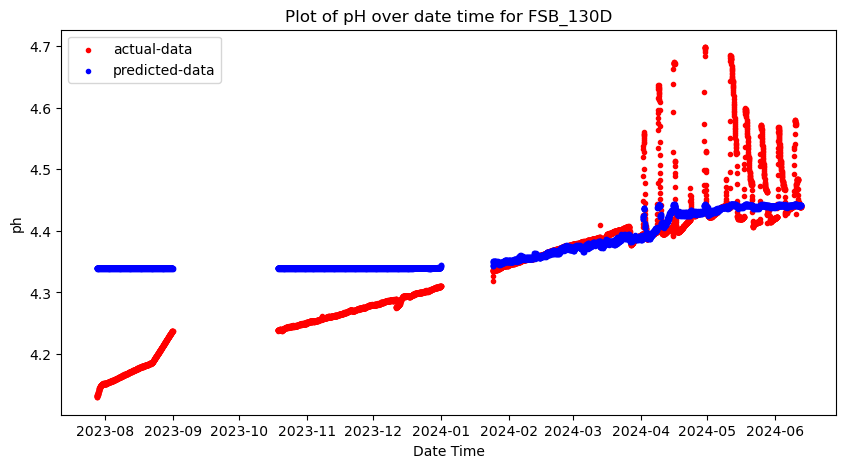

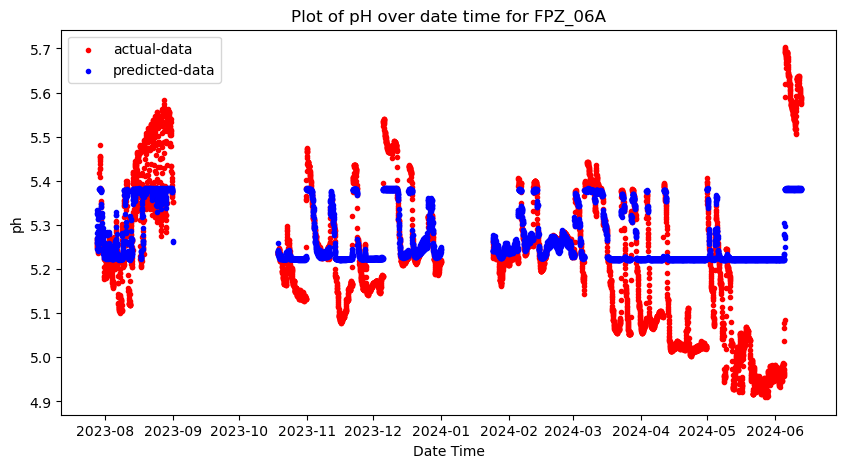

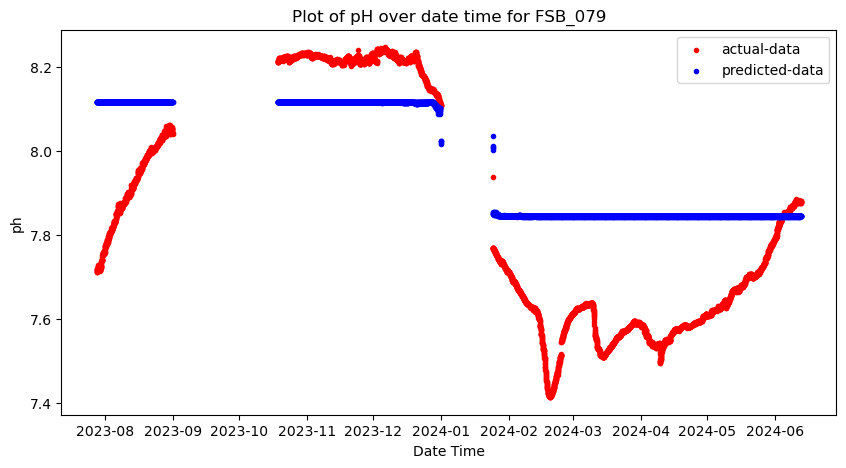

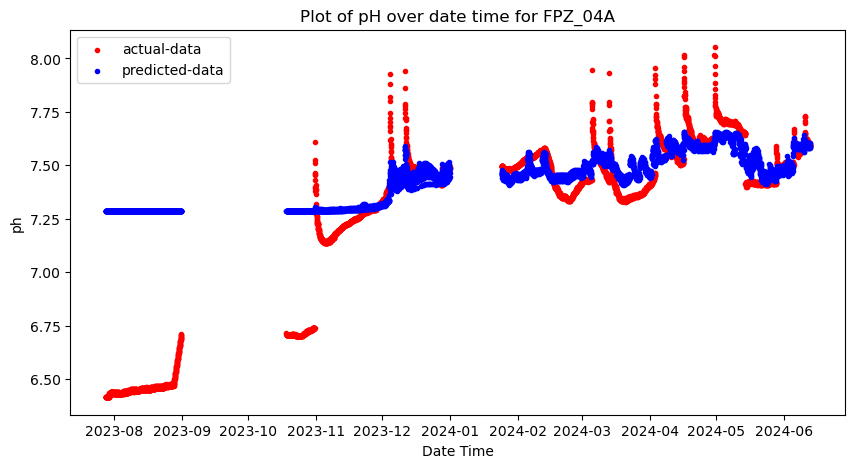

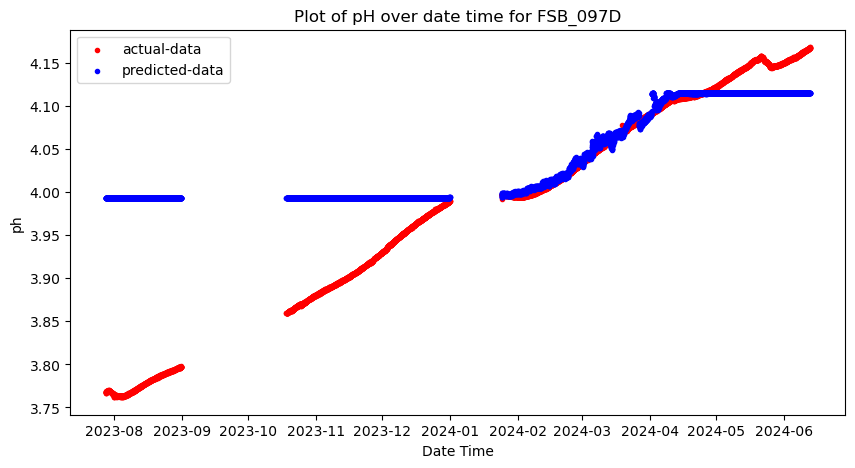

In [1257]:
for index,station in enumerate(stations_name):
    
    plt.figure(figsize=(10, 5))
    # index = 0
    plt.scatter(date_time, input_df[stations[index]], marker='.', color="red", label="actual-data")
    plt.scatter(date_time, predicted_reshaped_df[stations[index]], marker='.', color="blue", label = "predicted-data")


    plt.xlabel('Date Time')
    plt.ylabel('ph')
    plt.title(f'Plot of pH over date time for {stations[index]}')
    plt.legend()
    plt.show()